# Logistic Regression Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlvirtus import *

In [14]:
df = pd.read_csv('ex2data2.txt', header=None).to_numpy()

X = df[:,:-1]
y = df[:,-1:]
#add x intercept term
X = np.insert(X,0,1,axis=1)

In [15]:
model = LogisticRegression(alpha=.2,Lambda=1)

x1=X[:,1]
x2=X[:,2]

X = model.Feature_Mapping(x1,x2,6)

#initialize starting theta
init_theta = np.zeros((X.shape[1],1))

cost,gradients = model.Logistic_Regression_Cost(X,y,init_theta)

print("Cost at initial theta (zeros):",cost)
print("Gradients at initial theta(zeros):",gradients[0:5])


Cost at initial theta (zeros): 0.6931471805599454
Gradients at initial theta(zeros): [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [16]:
init_theta = np.zeros((X.shape[1],1))
theta,cost_history = model.Gradient_Descent(X,y,init_theta)

print(theta)

[[ 1.2054486 ]
 [ 0.58277827]
 [ 1.13157717]
 [-1.92049484]
 [-0.83083409]
 [-1.28529448]
 [ 0.10198551]
 [-0.34262927]
 [-0.34146035]
 [-0.18124517]
 [-1.40981655]
 [-0.06607042]
 [-0.58045607]
 [-0.24620059]
 [-1.14693317]
 [-0.2432262 ]
 [-0.20118933]
 [-0.05872719]
 [-0.25855446]
 [-0.27176909]
 [-0.49104147]
 [-1.0159412 ]
 [ 0.01109511]
 [-0.28021768]
 [ 0.00479188]
 [-0.30981928]
 [-0.12608776]
 [-0.94027054]]


Text(0.5, 1.0, 'Cost Function Plot using Gradient Descent')

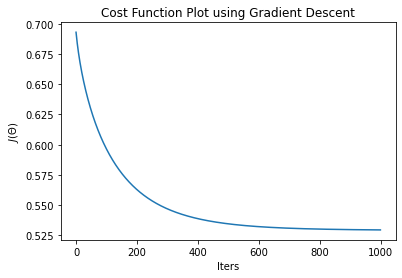

In [17]:
plt.plot(cost_history)
plt.xlabel("Iters")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function Plot using Gradient Descent")

In [18]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

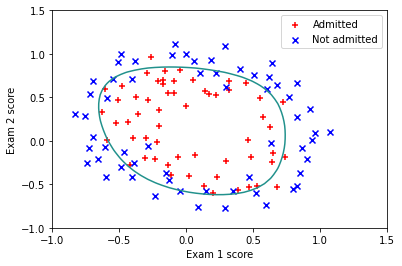

In [19]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [20]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [29]:
p=classifierPredict(theta,X)
correct = sum(p==y)

Accuracy = correct/len(y) * 100

Accuracy

array([83.05084746])

# Linear Regression Testing

In [31]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from mlvirtus import *

In [89]:
data = load_boston()

df = pd.DataFrame(data.data,columns=data.feature_names)

df['MEDV'] = data['target']
target = df['MEDV'].copy()
del df['MEDV']


df = pd.concat((df,target),axis=1)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


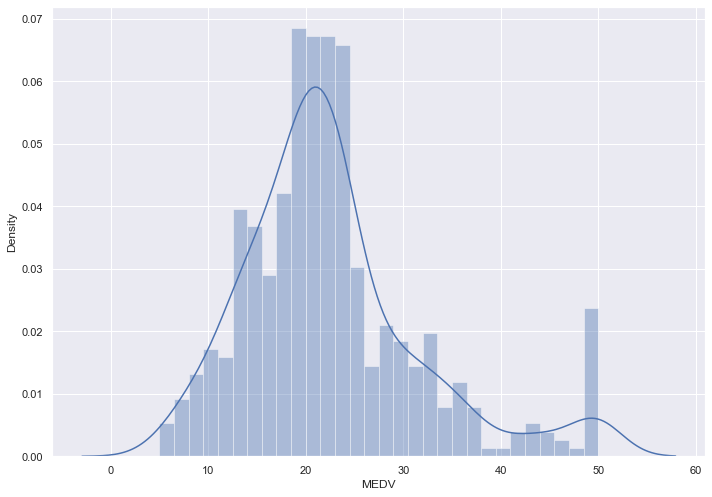

In [67]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

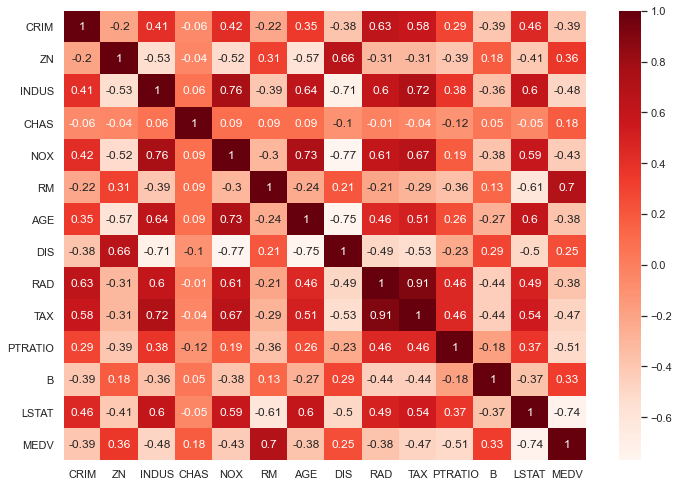

In [103]:
correlation = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation, annot=True, cmap='Reds')

In [83]:
model = LinearRegression(iters=1000)

In [84]:
X,y = load_boston(return_X_y=True)

In [85]:
mu, sigma, X = model.Feature_Normalize(X)

In [86]:
X = np.insert(X,0,1,axis=1)

In [87]:
init_theta = np.zeros((X.shape[1],1))

theta, cost_history = model.Gradient_Descent(X,y,init_theta)

Text(0.5, 1.0, 'Cost Function Plot using Gradient Descent')

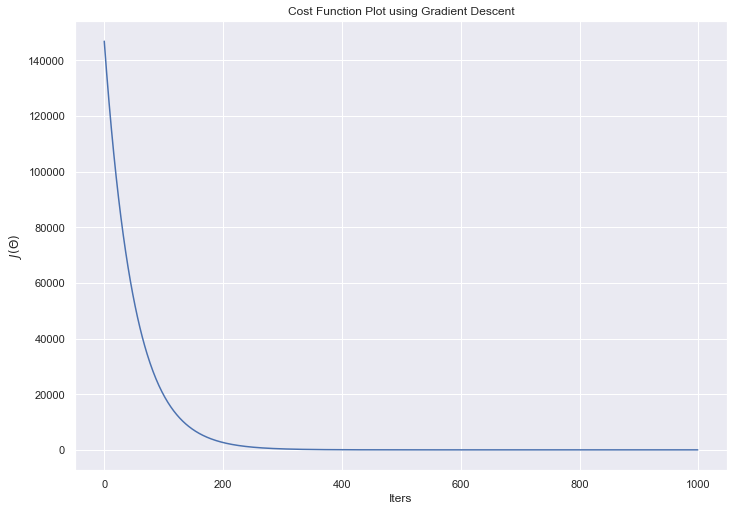

In [88]:
plt.plot(cost_history)
plt.xlabel("Iters")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function Plot using Gradient Descent")

In [99]:
new_data = np.array([0.00622, 17.0, 2.30,0.0,0.50,6.22,62,3.99,1.0,295.0,15.2,396.90,4.99]-mu/sigma)
intercept = np.array([1])


data = np.concatenate((intercept,new_data),axis=0)

data

array([ 1.00000000e+00, -4.14297417e-01,  1.65122776e+01,  6.75039912e-01,
       -2.72598567e-01, -4.29163901e+00, -2.73345891e+00,  5.95614373e+01,
        2.18595383e+00, -9.78032094e-02,  2.92575364e+02,  6.66685348e+00,
        3.92989298e+02,  3.21637225e+00])

In [100]:
price = model.Prediction(data,theta)

In [102]:
price *1000

23998.96389006357